In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models,layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

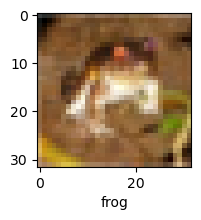

In [10]:
plot_sample(X_train, y_train, 0)

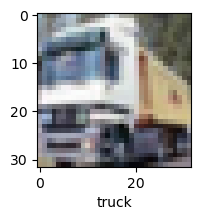

In [11]:
plot_sample(X_train, y_train, 1)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

C:\Users\KIIT\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.3069 - loss: 1.9303
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.4154 - loss: 1.6510
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.4544 - loss: 1.5529
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.4731 - loss: 1.4858
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.4962 - loss: 1.4398


In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.51      0.56      1000
           1       0.67      0.49      0.56      1000
           2       0.39      0.41      0.40      1000
           3       0.39      0.25      0.31      1000
           4       0.53      0.26      0.35      1000
           5       0.44      0.32      0.37      1000
           6       0.53      0.54      0.53      1000
           7       0.38      0.73      0.50      1000
           8       0.62      0.61      0.62      1000
           9       0.45      0.70      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



In [17]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='softmax')
])

In [18]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3184 - loss: 1.9136
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5537 - loss: 1.2673
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6124 - loss: 1.1057
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6461 - loss: 1.0128
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6727 - loss: 0.9399
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6892 - loss: 0.8920
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7111 - loss: 0.8389
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7262 - loss: 0.7890
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7356 - loss: 0.7604
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7482 - loss: 0.7229


In [20]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6878 - loss: 0.9282


[0.9335276484489441, 0.6895999908447266]

In [21]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[8.48133117e-03, 5.34749357e-04, 5.35326719e-04, 8.71210396e-01,
        4.00494039e-03, 3.65223959e-02, 3.36648449e-02, 1.18252507e-03,
        4.27641422e-02, 1.09938858e-03, 4.13273062e-12, 1.80192634e-12,
        7.18298164e-12, 3.80092062e-13, 7.85781683e-12, 1.76416423e-12,
        1.58897045e-11, 3.04054958e-12, 5.73763996e-12, 4.33265229e-11,
        2.20849923e-12, 2.20460217e-12, 2.41630032e-11, 1.48961069e-11,
        1.75625538e-11, 6.29779215e-12, 1.96427889e-13, 2.34285117e-12,
        1.22361088e-11, 1.11904749e-10, 5.56516465e-12, 9.16501684e-12,
        3.91119342e-12, 9.52923677e-12, 1.78523307e-11, 1.27249964e-11,
        1.26344490e-11, 7.28477782e-12, 5.69068794e-12, 9.78189751e-12,
        7.24548338e-11, 1.15746666e-11, 4.94925064e-12, 3.15478004e-12,
        1.03420779e-10, 6.87609908e-12, 4.75859499e-12, 1.30581553e-11,
        4.34606032e-11, 3.82238382e-12, 4.57833587e-13, 4.52510295e-12,
        4.78571956e-12, 1.22019426e-11, 9.68288297e-12, 2.308630

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [23]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

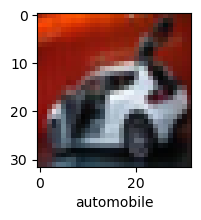

In [28]:
plot_sample(X_test, y_test,6)

In [29]:
classes[y_classes[6]]

'automobile'

In [31]:
print(classification_report(y_test,y_classes))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73      1000
           1       0.79      0.83      0.81      1000
           2       0.55      0.64      0.59      1000
           3       0.55      0.41      0.47      1000
           4       0.63      0.63      0.63      1000
           5       0.60      0.59      0.59      1000
           6       0.67      0.84      0.75      1000
           7       0.80      0.69      0.74      1000
           8       0.84      0.77      0.81      1000
           9       0.82      0.70      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



Text(95.72222222222221, 0.5, 'Truth')

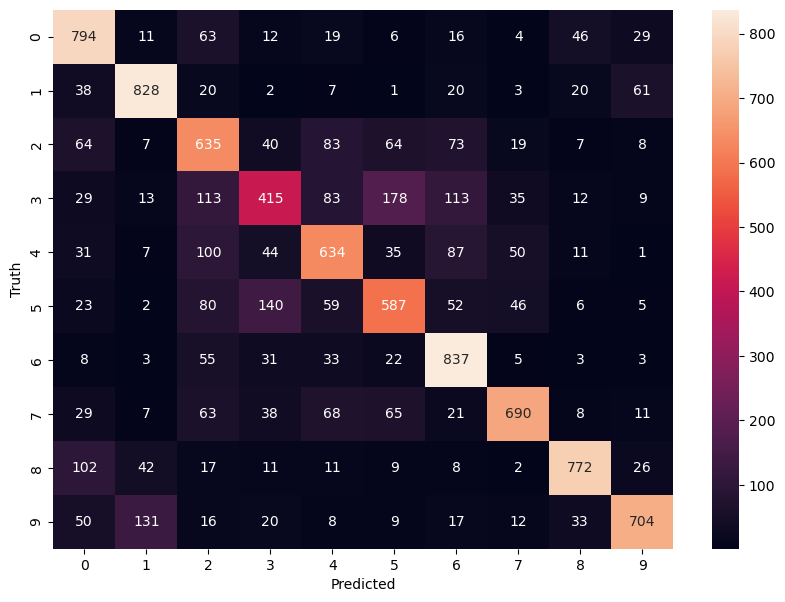

In [33]:
import seaborn as sns
cm = cm = tf.math.confusion_matrix(labels=y_test,predictions=y_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")